In [ ]:
!pip install emoji
# !pip install tweepy --upgrade


In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import emoji
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

import warnings

# plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
upload1=files.upload()

Saving train_tweet.csv to train_tweet.csv


In [ ]:
df=pd.read_csv("train_tweet.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
#cleaning the tweets
def clean_tweet(a):
  a=re.sub('#bitcoin','bitcoin',a)
  a=re.sub('#Bitcoin','Bitcoin',a)
  a=re.sub('#Ethereum','Ethereum',a)
  a=emoji.demojize(a)
  a=a.replace(":","")
  a = BeautifulSoup(a).get_text()
  a=re.sub('(#[A-Za-z0-9]+|@[A-Za-z0-9])',"",a)
  a=' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", a).split())
  a=re.sub('\\n','',a)
  a=re.sub('\w+:\/\/\S+','',a)
  # a = ' '.join(re.sub("(\w+:\/\/\S+)", " ", a).split())
  return a 
df['fresh_tweet']=df['tweet'].apply(clean_tweet)
df.head(10)

<ipython-input-7-1f69447d85b1>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  a = BeautifulSoup(a).get_text()


,id,label,tweet,Tweets,fresh_tweet
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so s...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,ser ser thanks for credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,i love u take with u all the time in urð± ð...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now
...,...,...,...,...,...
95,96,0,@user i'll always hope that one day i'll get t...,@user i'll always hope that one day i'll get t...,ser i'll always hope that one day i'll get to ...
96,97,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,i love u take with u all the time in urð± ð...
97,98,0,couple having sex fat naked japanese girls,couple having sex fat naked japanese girls,couple having sex fat naked japanese girls
98,99,0,#hump on that #hump day #humpersð© @ edwa...,#hump on that #hump day #humpersð© @ edwa...,on that day ðcopyright @ edwardsville pennsy...


In [ ]:
def getSubjectivity(b):
  return TextBlob(b).sentiment.subjectivity

def getpolarity(b):
  return TextBlob(b).sentiment.polarity

df['subjectivity']=df['fresh_tweet'].apply(getSubjectivity)
df['polarity']=df['fresh_tweet'].apply(getpolarity)
df.head(50)

,id,label,tweet,Tweets,fresh_tweet,subjectivity,polarity
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so s...,1.000000,-0.500000
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,ser ser thanks for credit i can't use cause th...,0.200000,0.200000
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,0.000000,0.000000
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,i love u take with u all the time in urð± ð...,0.600000,0.500000
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now,0.000000,0.000000
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,0.500000,0.200000
6,7,0,@user camping tomorrow @user @user @user @use...,@user camping tomorrow @user @user @user @use...,ser camping tomorrow ser ser ser ser ser ser s...,0.000000,0.000000
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...,the next school year is the year for exams ð...,0.000000,0.000000
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...,we won love the land â¦,0.600000,0.500000
9,10,0,@user @user welcome here ! i'm it's so #gr...,@user @user welcome here ! i'm it's so #gr...,ser ser welcome here i'm it's so,0.900000,0.800000


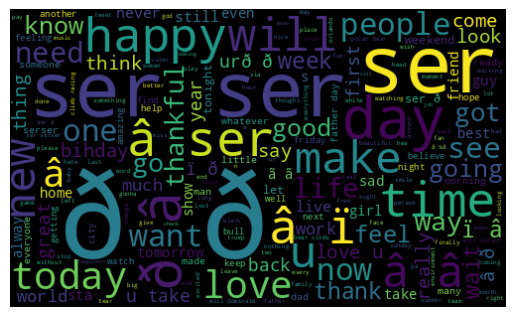

In [ ]:
# allwords=''.join([t for t in df['fresh_tweet'][df['label']==0]])
allwords=''.join([t for t in df['fresh_tweet']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# function to get sentiment of tweets
def getSentiment(tweet):
  if tweet<0:
    return "Negative"
  elif tweet==0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
# Now we are storing the sentiments
df['Sentiment']=df['polarity'].apply(getSentiment)
df.head(10)

,id,label,tweet,Tweets,fresh_tweet,subjectivity,polarity,Sentiment
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so s...,1.0,-0.5,Negative
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,ser ser thanks for credit i can't use cause th...,0.2,0.2,Positive
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,0.0,0.0,Neutral
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,i love u take with u all the time in urð± ð...,0.6,0.5,Positive
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now,0.0,0.0,Neutral
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,0.5,0.2,Positive
6,7,0,@user camping tomorrow @user @user @user @use...,@user camping tomorrow @user @user @user @use...,ser camping tomorrow ser ser ser ser ser ser s...,0.0,0.0,Neutral
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...,the next school year is the year for exams ð...,0.0,0.0,Neutral
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...,we won love the land â¦,0.6,0.5,Positive
9,10,0,@user @user welcome here ! i'm it's so #gr...,@user @user welcome here ! i'm it's so #gr...,ser ser welcome here i'm it's so,0.9,0.8,Positive


In [ ]:
j=1
sort=df.sort_values(by=['polarity'])
for i in range(0,20):
  if (sort['Sentiment'][i]=='Positive'):
    print(str(j)+") "+sort['fresh_tweet'][i])
    print()
    j+=1

1) ser ser thanks for credit i can't use cause they don't offer wheelchair vans in pdx

2) i love u take with u all the time in urð± ðððð ð¦ð¦ð¦

3) [2/2] huge fan fare and big talking before they leave chaos and pay disputes when they get there

4) we won love the land â¦

5) ser ser welcome here i'm it's so



In [ ]:
j=1
sort=df.sort_values(by=['polarity'],ascending=False)
for i in range(0,20):
  if (sort['Sentiment'][i]=='Negative'):
    print(str(j)+") "+sort['fresh_tweet'][i])
    print()
    j+=1

1) ser when a father is dysfunctional and is so selfish he drags his kids into his dysfunction

2) â consumer price index (mom) climbed from previous 0 2% to 0 5% in may

3) we are so selfish #



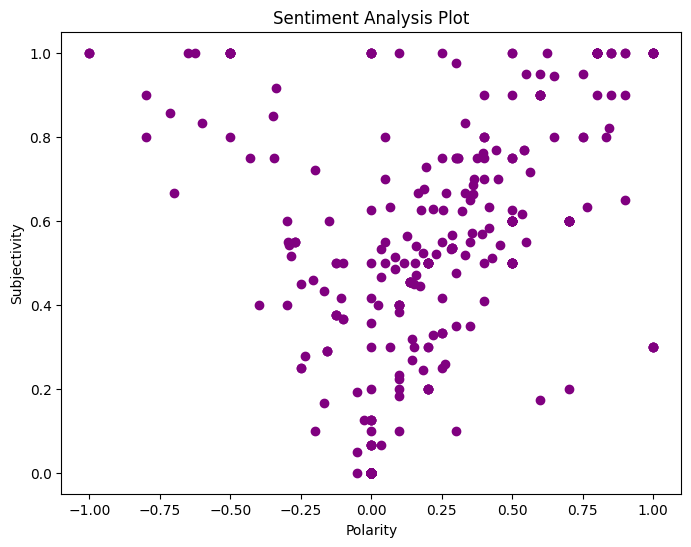

In [ ]:
# plotting to show the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0,500):
  plt.scatter(df['polarity'][i],df['subjectivity'][i],color='Purple')
plt.title('Sentiment Analysis Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
# calculate the percentage

ptweets=df[df.Sentiment=='Positive']
ptweets=ptweets['fresh_tweet']
print("Positive percentage",round((ptweets.shape[0]/df.shape[0])*100,1))

ptweets=df[df.Sentiment=='Negative']
ptweets=ptweets['fresh_tweet']
print("Negative percentage",round((ptweets.shape[0]/df.shape[0])*100,1))

ptweets=df[df.Sentiment=='Neutral']
ptweets=ptweets['fresh_tweet']
print("Neutral percentage",round((ptweets.shape[0]/df.shape[0])*100,1))


Positive percentage 40.4
Negative percentage 13.1
Neutral percentage 46.5


In [ ]:
df.shape[0]

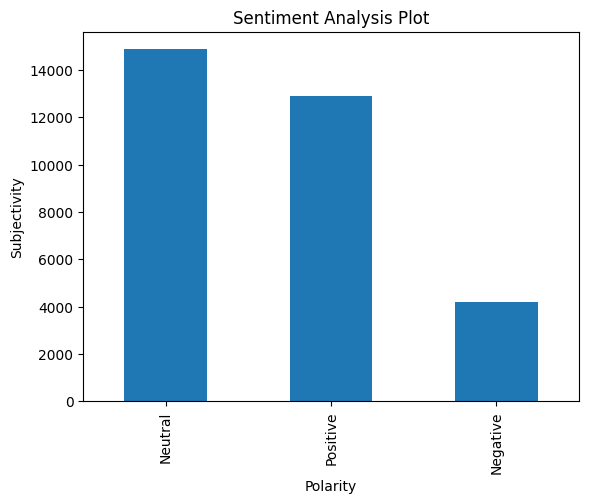

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Neutral     14874
Positive    12907
Negative     4181
Name: Sentiment, dtype: int64


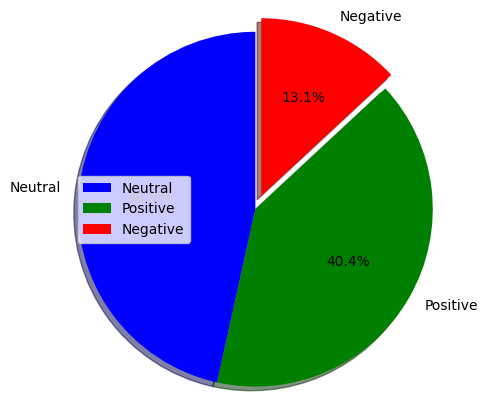

In [ ]:
# bar chart for analysis
a=df['Sentiment'].value_counts()
print(a)
l=[]
for i in a:
  l.append(i)
activities = ["Neutral","Positive","Negative"]
  
colors = ['b', 'g', 'r']
  
# plotting the pie chart
plt.pie(l, labels = activities, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0, 0.1),
        radius = 1.2, autopct = '%1.1f%%')

plt.legend()
plt.show()

In [ ]:
df[df['label']==1].head(10)

In [ ]:
df.groupby('label').describe()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

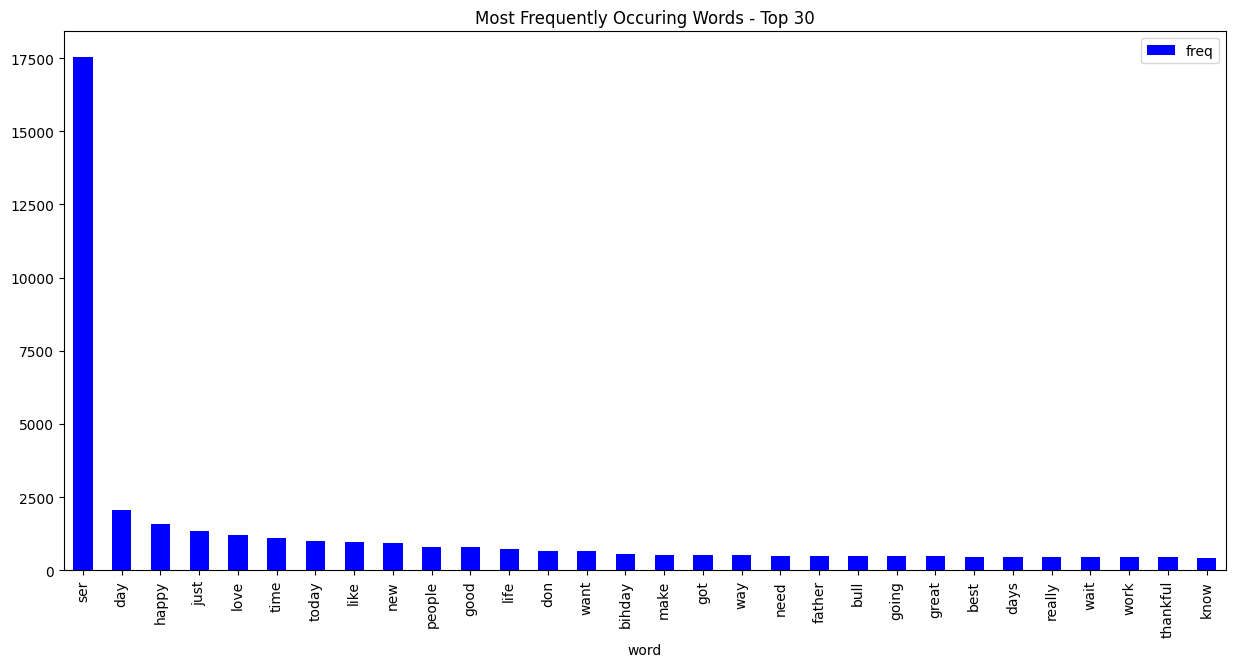

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.fresh_tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [ ]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(df['tweet'][df['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['tweet'][df['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

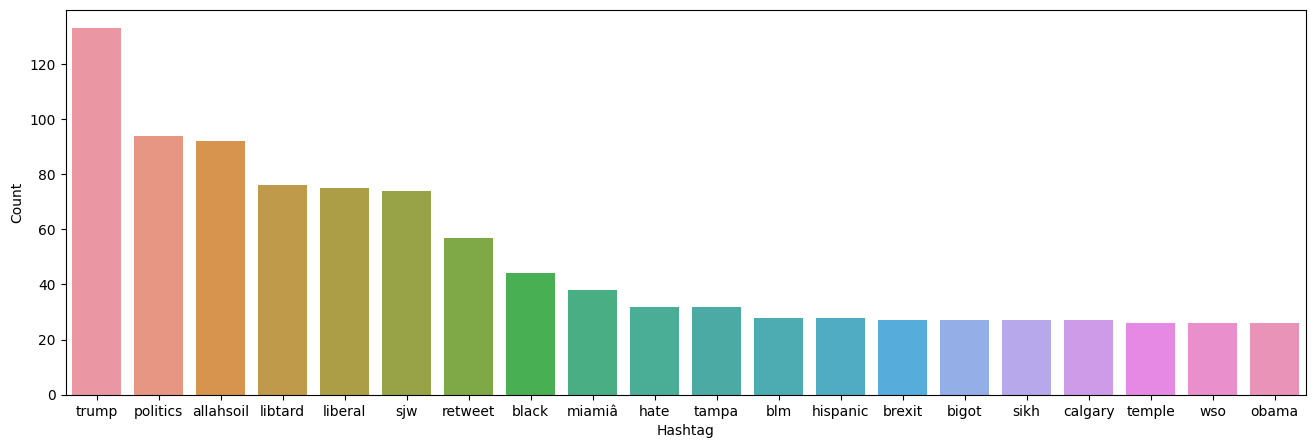

In [ ]:
import nltk
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()